## 背景介绍
* MNist：大多数示例使用手写数字的MNIST数据集[1]。该数据集包含60,000个用于训练的示例和10,000个用于测试的示例。这些数字已经过尺寸标准化并位于图像中心，图像是固定大小(28x28像素)，其值为0到1。为简单起见，每个图像都被平展并转换为784(28 * 28)个特征的一维numpy数组。
* [Mnist](http://yann.lecun.com/exdb/mnist/)
* ![test](md_img/mnist.png)
# 本次实验目标
> 输入28*28的灰度图片，输出0-9的预测结果


输入: 784  
输出: 10  

$$\vec{h} = A(data + b_0)$$

$$\vec{output} = B(\vec{h}w_1 + b_1)$$

____
* 参数维度

data:784

output:10

$b_0$:784

$\vec{h}$:784

$w_1$:[784, 10]

$b_1$:10
____
* 参数初始化

$b_0 = 0$

$b_1 = 0$

$w_1 = [-1,1]$

* 激活函数
____

A:tanh 如果输入过大或者过小，对输出的影响都不敏感，在较小的区间内呈现出类似于线性函数的特征

B:softmax 分类器，输出每种分类的概率
____

## 正式开始实现

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#定义需要的两个激活函数
def tanh(x):
    return np.tanh(x)
def softmax(x):
    exp=np.exp(x-x.max())
    return exp/exp.sum()

In [3]:
np.exp(1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

In [14]:
softmax(np.array([-2,-1,0]))

array([0.09003057, 0.24472847, 0.66524096])

In [45]:
dimensions=[28*28,10]
activation=[tanh,softmax]
# distribution=[
#     {'b':[0,0]},
#     {'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]},
# ]
distribution=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-1,1]},
]

In [46]:
#实现初始化参数
def init_parameters_b(layer):
    dist=distribution[layer]['b']
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters_w(layer):
    dist=distribution[layer]['w']
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters():
    parameter=[]
    for i in range(len(distribution)):
        layer_parameter={}
        for j in distribution[i].keys():
            if j=='b':
                layer_parameter['b']=init_parameters_b(i)
                continue
            if j=='w':
                layer_parameter['w']=init_parameters_w(i)
                continue
        parameter.append(layer_parameter)
    return parameter

In [47]:
parameters=init_parameters()

In [48]:
#测试参数生成
import tensorflow as tf
# print(tf.shape(parameters[0]['b']))
# print(tf.shape(parameters[1]['b']))
# print(tf.shape(parameters[1]['w']))
parameters

[{'b': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## 定义预测函数

* 输入: 28*28
* 输出: 10

$\vec{h} = A(data + b_0)$

output = $B(\vec{h} w_1 + b_1)$
____

In [15]:
#定义预测函数
def predict(img,parameters):
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    return l1_out

In [16]:
#测试预测函数
predict(np.random.rand(784),parameters)

array([1.31779086e-06, 2.43796927e-07, 2.34876198e-10, 4.46492815e-02,
       5.90359130e-02, 8.78048316e-02, 1.67109396e-02, 2.06152860e-10,
       7.91797467e-01, 5.26289356e-09])

## 读取数据集
* 读取数据集
* 展示数据集

In [17]:
#读取数据集
from pathlib import Path
import struct
dataset_path=Path('./MNIST')
train_img_path=dataset_path/'train-images.idx3-ubyte'
train_lab_path=dataset_path/'train-labels.idx1-ubyte'
test_img_path=dataset_path/'t10k-images.idx3-ubyte'
test_lab_path=dataset_path/'t10k-labels.idx1-ubyte'

In [18]:
train_num=50000
valid_num=10000
test_num=10000

with open(train_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    tmp_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)/255
    train_img=tmp_img[:train_num]
    valid_img=tmp_img[train_num:]
    
with open(test_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)/255

with open(train_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    tmp_lab=np.fromfile(f,dtype=np.uint8)
    train_lab=tmp_lab[:train_num]
    valid_lab=tmp_lab[train_num:]
    
with open(test_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_lab=np.fromfile(f,dtype=np.uint8)

In [19]:
def show_train(index):
    plt.imshow(train_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(train_lab[index]))
def show_valid(index):
    plt.imshow(valid_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(valid_lab[index]))
def show_test(index):
    plt.imshow(test_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(test_lab[index]))

label : 2


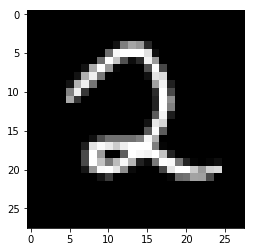

In [22]:
#测试show_train
show_train(np.random.randint(train_num))

label : 9


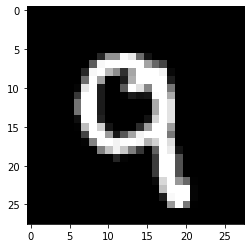

In [15]:
#测试show_test
show_test(np.random.randint(test_num))

## 定义激活函数的导数

In [23]:
#定义两个激活函数的导数
def d_softmax(data):
    sm=softmax(data)
    return np.diag(sm)-np.outer(sm,sm)

# def d_tanh(data):
#     return np.diag(1/(np.cosh(data))**2)
def d_tanh(data):
    return 1/(np.cosh(data))**2

differential={softmax:d_softmax,tanh:d_tanh}

$tanh(x)' = \frac{1}{cosx^2}$

$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

$[\frac{e^1}{e^1 + e^2 + e^3}, \frac{e^2}{e^1 + e^2 + e^3}, \frac{e^3}{e^1 + e^2 + e^3}]$

In [17]:
np.exp(1000)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

## 定义损失函数

In [24]:
#定义损失函数
onehot=np.identity(10)

def sqr_loss(img,lab,parameters):
    y_pred=predict(img,parameters)
    y=onehot[lab]
    diff=y-y_pred
    return np.dot(diff,diff)

In [25]:
#测试损失函数
sqr_loss(train_img[0],train_lab[0],parameters)

1.9822012546332282

## 定义梯度

In [26]:
def grad_parameters(img,lab,parameters):
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    
    diff=onehot[lab]-l1_out
    act1=np.dot(differential[activation[1]](l1_in),diff)
    
    grad_b1=-2*act1
    grad_w1=-2*np.outer(l0_out,act1)
    grad_b0=-2*differential[activation[0]](l0_in)*np.dot(parameters[1]['w'],act1)
    
    return {'w1':grad_w1,'b1':grad_b1,'b0':grad_b0}

In [27]:
grad_parameters(train_img[2],train_lab[2],init_parameters())

{'w1': array([[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]]),
 'b1': array([-8.97529566e-04, -1.57305145e-04, -1.13258721e-05,  1.51856573e-02,
        -3.34573808e-03, -8.80455733e-04, -6.32826250e-03, -3.27152101e-03,
        -2.34009828e-04, -5.95096104e-05]),
 'b0': array([-8.35839128e-03, -5.34125889e-03, -1.37208082e-02,  5.61553159e-03,
         1.95620702e-02,  4.82436064e-03, -1.81148739e-02,  7.06783791e-03,
         6.77894581e-03, -6.20645121e-05, -1.03271620e-02,  8.64674933e-03,
         1.20581038e-02, -1.66106477e-02,  1.42724550e-03, -2.10642636e-03,
         5.17487744e-03,  6.77834056e-03,  5.23595222e-03,  9.60313306e-03,
         5.52857690e-03,  1.52551626e-02,  1.26690528e-02, -9.09700995e-03,
        -7.05989943e-03, -1.50500067e-03,  1.

## 定义评估指标

In [28]:
def valid_loss(parameters):
    loss_accu=0
    for img_i in range(valid_num):
        loss_accu+=sqr_loss(valid_img[img_i],valid_lab[img_i],parameters)
    return loss_accu/(valid_num/10000)
def valid_accuracy(parameters):
    correct=[predict(valid_img[img_i],parameters).argmax()==valid_lab[img_i] for img_i in range(valid_num)]
    return correct.count(True)/len(correct)
def train_loss(parameters):
    loss_accu=0
    for img_i in range(train_num):
        loss_accu+=sqr_loss(train_img[img_i],train_lab[img_i],parameters)
    return loss_accu/(train_num/10000)
def train_accuracy(parameters):
    correct=[predict(train_img[img_i],parameters).argmax()==train_lab[img_i] for img_i in range(train_num)]
    return correct.count(True)/len(correct)

In [23]:
valid_loss(parameters)

13449.21139711269

In [24]:
valid_accuracy(init_parameters())

0.0597

## 实现梯度下降

In [29]:
#把一百张图片的所有梯度全部累加起来，最后求平均梯度
batch_size=100
def train_batch(current_batch,parameters):
    grad_accu=grad_parameters(train_img[current_batch*batch_size+0],train_lab[current_batch*batch_size+0],parameters)
    for img_i in range(1,batch_size):
        grad_tmp=grad_parameters(train_img[current_batch*batch_size+img_i],train_lab[current_batch*batch_size+img_i],parameters)
        for key in grad_accu.keys():
            grad_accu[key]+=grad_tmp[key]
    for key in grad_accu.keys():
        grad_accu[key]/=batch_size
    return grad_accu

In [30]:
#测试一个batch中所有图片的平均梯度
train_batch(0,parameters)

{'w1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': array([ 0.00874219, -0.01276774, -0.0039926 ,  0.00363073, -0.00513142,
        -0.00366867, -0.00018688, -0.00298586, -0.00433429,  0.02069452]),
 'b0': array([-1.81850276e-02, -1.02207308e-02,  1.92651876e-02, -1.73566285e-04,
        -2.51735358e-02,  1.11499073e-04,  3.24630464e-03,  2.30367597e-03,
         2.52798278e-02,  8.58259912e-03, -9.13023585e-03, -1.41069236e-03,
        -7.47181937e-03, -1.23543160e-02,  1.02901466e-02,  1.34940544e-02,
        -5.25398869e-03,  1.78741544e-02,  1.93491484e-02, -3.21426702e-03,
         1.76287480e-02,  6.60648604e-03, -1.68483598e-02, -2.25979727e-02,
         1.63509321e-02,  2.28653300e-02, -2.71663969e-02, -1.36178843e-02,
         6.61943136e-03, -1.24898025e-02,  2.02470048

In [31]:
#将得到的梯度累加到初始化的参数上，实现梯度下降算法(参数更新)
import copy
def combine_parameters(parameters,grad,learn_rate):
    parameter_tmp=copy.deepcopy(parameters)
    parameter_tmp[0]['b']-=learn_rate*grad['b0']
    parameter_tmp[1]['b']-=learn_rate*grad['b1']
    parameter_tmp[1]['w']-=learn_rate*grad['w1']
    return parameter_tmp

In [32]:
#测试梯度下降
combine_parameters(parameters,train_batch(0,parameters),1)

[{'b': array([ 1.81850276e-02,  1.02207308e-02, -1.92651876e-02,  1.73566285e-04,
          2.51735358e-02, -1.11499073e-04, -3.24630464e-03, -2.30367597e-03,
         -2.52798278e-02, -8.58259912e-03,  9.13023585e-03,  1.41069236e-03,
          7.47181937e-03,  1.23543160e-02, -1.02901466e-02, -1.34940544e-02,
          5.25398869e-03, -1.78741544e-02, -1.93491484e-02,  3.21426702e-03,
         -1.76287480e-02, -6.60648604e-03,  1.68483598e-02,  2.25979727e-02,
         -1.63509321e-02, -2.28653300e-02,  2.71663969e-02,  1.36178843e-02,
         -6.61943136e-03,  1.24898025e-02, -2.02470048e-02,  2.75519002e-02,
         -1.99576112e-02, -5.73842661e-03, -1.51042856e-02, -2.22187069e-03,
         -3.19924791e-03, -9.40312841e-03,  6.18120987e-03,  1.88375653e-02,
         -9.88513835e-03, -2.65665341e-02,  3.39982232e-02,  5.39427791e-03,
          1.69039775e-02,  1.17710716e-02,  2.03324662e-02, -1.22990256e-02,
          1.27431218e-03,  2.57216418e-03,  2.35066095e-02, -2.06949849

## 定义训练模型部分

In [49]:
parameters=init_parameters()
current_epoch=0
train_loss_list=[]
valid_loss_list=[]
train_accu_list=[]
valid_accu_list=[]

In [50]:
valid_accuracy(parameters)

0.1233

In [51]:
# from tqdm.notebook import tqdm
learn_rate=10**-0.6
# learn_rate=1
epoch_num=15
for epoch_ in range(epoch_num):
    for i in range(train_num//batch_size):
        if i%100==99:
            print('running batch {}/{}'.format(i+1,train_num//batch_size))
        grad_tmp=train_batch(i,parameters)
        parameters=combine_parameters(parameters,grad_tmp,learn_rate)
    current_epoch+=1
    train_loss_list.append(train_loss(parameters))
    train_accu_list.append(train_accuracy(parameters))
    valid_loss_list.append(valid_loss(parameters))
    valid_accu_list.append(valid_accuracy(parameters))

running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500
running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500
running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500
running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500
running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500
running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500
running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500
running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500
running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500
running ba

In [37]:
valid_accuracy(parameters)

0.9059

In [53]:
parameters

[{'b': array([-2.76237932e-02, -1.79778075e-02,  2.55070160e-02, -5.22008726e-02,
         -6.71540332e-03, -1.10427145e-02, -4.86762960e-02,  5.99290394e-03,
          1.51612001e-02, -4.18191286e-02, -3.91163230e-02, -2.03504836e-02,
          7.17766967e-02, -1.78821323e-02, -2.16092807e-02, -3.28430137e-02,
         -7.63118756e-03,  7.72874722e-03,  8.21135092e-03, -7.71014253e-02,
          5.79488262e-02,  5.22644544e-02,  4.29396109e-02,  2.21123214e-03,
          1.08631243e-01,  5.27835660e-02,  6.08502551e-02,  8.48960325e-02,
         -1.77527925e-02,  4.79391434e-02, -7.42050947e-02, -4.46295249e-02,
          4.01541774e-02,  2.25738669e-02,  2.42827869e-03, -3.03544386e-02,
          7.12157272e-03, -1.38378570e-02,  6.23991790e-02, -4.93243612e-02,
         -7.74088679e-03, -4.94290698e-02, -1.89945475e-02, -1.50120573e-02,
         -5.66331398e-02, -4.19074959e-02,  6.06223201e-02, -9.99513852e-02,
         -4.89657325e-02, -2.58901804e-03,  2.39392138e-02,  3.07800227

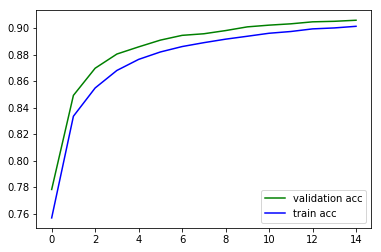

In [38]:
#可视化acc
"""
初始化参数方式：随机初始化
learn_rate=1
epoch_num=15

"""
plt.plot(valid_accu_list, c='g', label='validation acc')
plt.plot(train_accu_list, c='b', label='train acc')
plt.legend()
plt.savefig('acc_act=tanh.png')

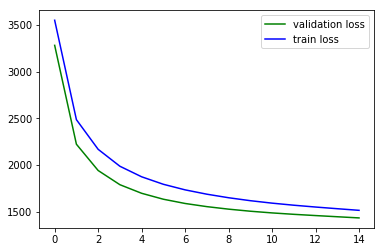

In [43]:
#可视化loss
"""
初始化参数方式：随机初始化
learn_rate=1
epoch_num=15

"""
plt.plot(valid_loss_list, c='g', label='validation loss')
plt.plot(train_loss_list, c='b', label='train loss')
plt.legend()
plt.savefig('train_loss')

label : 5
predict:5


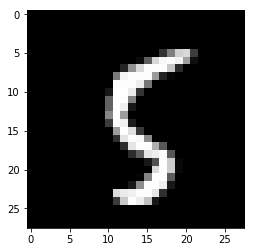

In [41]:
test_index = np.random.randint(1000)
show_test(test_index)
predict_result = predict(test_img[test_index], parameters)
print("predict:{}".format(predict_result.argmax()))

In [33]:
train_loss_list

[1426.4051646285063,
 1298.2394072709278,
 1236.657140455704,
 1198.6413557678056,
 1172.289350937169]

## 定义模型保存和读取

In [93]:
#保存参数以便部署
import pickle
model_prameters_name = 'Mnist_model.pkl'
f = open(model_prameters_name, 'wb')
pickle.dump(parameters, f)
f.close()

In [95]:
f = open(model_prameters_name, 'rb')
param = pickle.load(f)
print(param)
f.close

[{'b': array([ 1.86475420e-02, -2.08663133e-02, -1.04650078e-02, -4.12160803e-02,
        8.05465802e-03, -2.05834842e-02,  6.78438364e-03, -2.01531202e-02,
        2.40703711e-02, -3.06741277e-02,  8.22373293e-03, -3.43462734e-02,
       -2.61669791e-02,  8.30122059e-03, -4.32336558e-02,  1.82508263e-02,
        2.10729913e-02,  4.48215364e-03, -3.43179818e-02,  7.72463786e-03,
        2.58805606e-02,  9.76930048e-03,  1.45574990e-02, -3.04954519e-02,
        1.08129279e-02, -2.84416560e-02, -5.02200499e-02, -9.90889223e-04,
        3.37309197e-03, -1.16260883e-02, -3.23858807e-02,  1.04011001e-04,
       -2.98533062e-02, -1.06661316e-02,  1.49738957e-02,  1.72425717e-02,
       -4.17418143e-02,  2.40686670e-02,  2.09069400e-02,  7.96627764e-03,
       -3.29541738e-03, -1.58551901e-02, -1.59886351e-02,  1.36288509e-02,
       -1.58178084e-02,  5.20143734e-03,  1.23580932e-03,  9.95540438e-03,
        1.70101183e-02,  8.48983761e-03,  2.16062157e-02,  1.97360738e-02,
        2.45300535

<function BufferedReader.close>

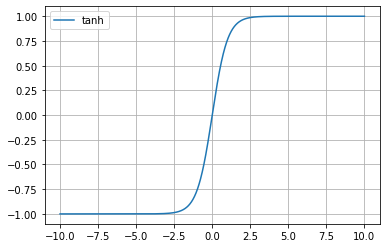

In [17]:
# tanh图像
import matplotlib.pyplot as plt
import numpy as np 

#函数
g=lambda z:(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

start=-10 
stop=10 
step=0.01
num=int((stop-start)/step)
x = np.linspace(start=start,stop=stop,num=num)
y = g(x)

fig=plt.figure(1)
plt.plot(x, y,label='tanh')
plt.grid(True)#显示网格

plt.legend()#显示旁注
plt.show(fig)

## 调参技巧

### 初始化参数时技巧

$w_1 = \begin{bmatrix}-\sqrt{\frac{6}{784+10}},\sqrt{\frac{6}{784+10}}\end{bmatrix}$

![](md_img/softmaxparameters.png)

* 为什么要这样初始化参数  
这是一种神经网络Xavier随机初始化
[Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)

推导所得的结果就是使该层中权重参数的每个元素都随机采样于均匀分布：

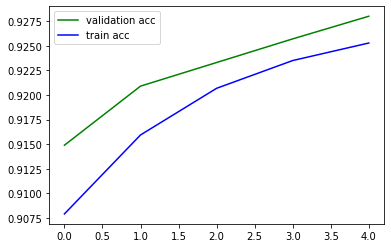

In [48]:
#可视化acc
"""
初始化参数方式：Xavier初始化参数
learn_rate=1
epoch_num=15

"""
plt.plot(valid_accu_list, c='g', label='validation acc')
plt.plot(train_accu_list, c='b', label='train acc')
plt.legend()
plt.savefig('acc_act=tanh.png')

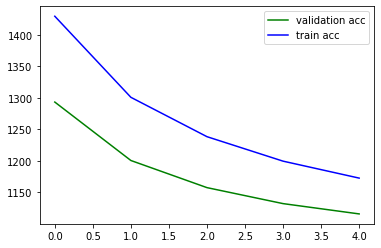

In [49]:
#可视化loss
"""
初始化参数方式：Xavier初始化参数
learn_rate=1
epoch_num=15

"""
plt.plot(valid_loss_list, c='g', label='validation acc')
plt.plot(train_loss_list, c='b', label='train acc')
plt.legend()
plt.savefig('acc_act=tanh.png')

### 可供调节的超参数
learn_rate  
epoch_num

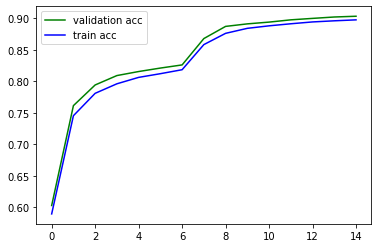

In [30]:
#可视化acc
"""
初始化参数方式：随机初始化
learn_rate=10**-0.6
epoch_num=15

"""
plt.plot(valid_accu_list, c='g', label='validation acc')
plt.plot(train_accu_list, c='b', label='train acc')
plt.legend()
plt.savefig('acc_act=tanh.png')

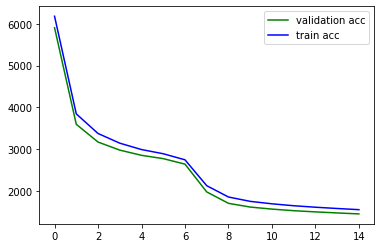

In [32]:
#可视化loss
"""
初始化参数方式：随机初始化
learn_rate=10**-0.6
epoch_num=15

"""
plt.plot(valid_loss_list, c='g', label='validation acc')
plt.plot(train_loss_list, c='b', label='train acc')
plt.legend()
plt.savefig('acc_act=tanh.png')